In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import nengo

In [10]:
model = nengo.Network(label='Basal Ganglia')
with model:
    basal_ganglia = nengo.networks.BasalGanglia(dimensions=3)



class ActionIterator(object):
    def __init__(self, dimensions):
        self.actions = np.ones(dimensions) * 0.1

    def step(self, t):
        # one action at time dominates
        dominate = int(t % 3)
        self.actions[:] = 0.1
        self.actions[dominate] = 0.8
        return self.actions


action_iterator = ActionIterator(dimensions=3)

with model:
    actions = nengo.Node(action_iterator.step, label="actions")

In [11]:
with model:
    nengo.Connection(actions, basal_ganglia.input, synapse=None)
    selected_action = nengo.Probe(basal_ganglia.output, synapse=0.01)
    input_actions = nengo.Probe(actions, synapse=0.01)

In [12]:
with nengo.Simulator(model) as sim:
    # This will take a while
    sim.run(6)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

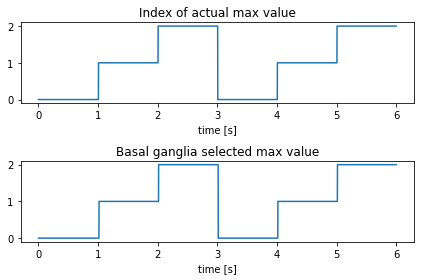

In [13]:
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(sim.trange(), sim.data[input_actions].argmax(axis=1))
plt.ylim(-0.1, 2.1)
plt.xlabel('time [s]')
plt.title("Index of actual max value")
plt.subplot(2, 1, 2)
plt.plot(sim.trange(), sim.data[selected_action].argmax(axis=1))
plt.ylim(-0.1, 2.1)
plt.xlabel('time [s]')
plt.title("Basal ganglia selected max value")
plt.tight_layout()